In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from math import log
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)


Tensorflow version: 2.8.2
Keras version: 2.8.0


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
# Normalizing
X_train = X_train/255
X_test = X_test/255
# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [11]:
#CNN1
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))

model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])\

In [ ]:
model.summary()

In [13]:
history = model.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_split=0.3,batch_size=128)

Epoch 1/50
274/274 [==============================] - 3s 9ms/step - loss: 1.4754 - accuracy: 0.4742 - val_loss: 1.2616 - val_accuracy: 0.5631
Epoch 2/50
274/274 [==============================] - 2s 7ms/step - loss: 1.0628 - accuracy: 0.6242 - val_loss: 1.0455 - val_accuracy: 0.6354
Epoch 3/50
274/274 [==============================] - 2s 8ms/step - loss: 0.8850 - accuracy: 0.6911 - val_loss: 0.9797 - val_accuracy: 0.6588
Epoch 4/50
274/274 [==============================] - 2s 8ms/step - loss: 0.7467 - accuracy: 0.7377 - val_loss: 0.9676 - val_accuracy: 0.6678
Epoch 5/50
274/274 [==============================] - 2s 8ms/step - loss: 0.6094 - accuracy: 0.7913 - val_loss: 0.9675 - val_accuracy: 0.6721
Epoch 6/50
274/274 [==============================] - 2s 7ms/step - loss: 0.4717 - accuracy: 0.8408 - val_loss: 1.0064 - val_accuracy: 0.6763
Epoch 7/50
274/274 [==============================] - 2s 7ms/step - loss: 0.3329 - accuracy: 0.8915 - val_loss: 1.0938 - val_accuracy: 0.6789
Epoch 

In [15]:
# make test predictions
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

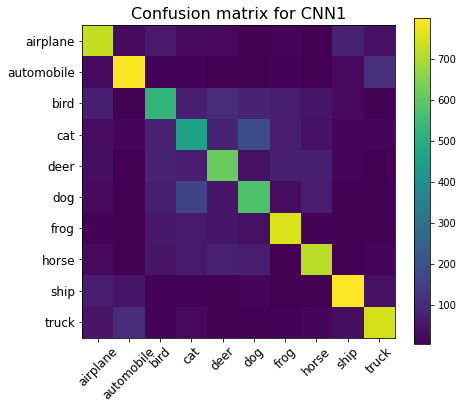

Test accuracy: 0.6708


In [25]:
# confusion matrix and accuracy

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix for CNN1', fontsize=16)
plt.imshow(confusion_matrix(Y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(Y_test, y_pred_test_classes))

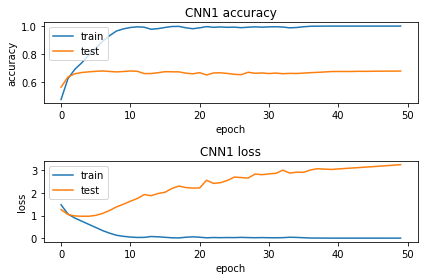

In [26]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

In [33]:
#CNN2
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])\

In [ ]:
model.summary()

In [35]:
history = model.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_split=0.3,batch_size=128)

Epoch 1/50
274/274 [==============================] - 3s 11ms/step - loss: 1.6954 - accuracy: 0.3781 - val_loss: 1.3386 - val_accuracy: 0.5177
Epoch 2/50
274/274 [==============================] - 3s 9ms/step - loss: 1.2680 - accuracy: 0.5486 - val_loss: 1.1876 - val_accuracy: 0.5754
Epoch 3/50
274/274 [==============================] - 2s 8ms/step - loss: 1.0734 - accuracy: 0.6201 - val_loss: 0.9770 - val_accuracy: 0.6544
Epoch 4/50
274/274 [==============================] - 2s 8ms/step - loss: 0.9472 - accuracy: 0.6638 - val_loss: 0.9032 - val_accuracy: 0.6839
Epoch 5/50
274/274 [==============================] - 3s 9ms/step - loss: 0.8737 - accuracy: 0.6905 - val_loss: 0.8563 - val_accuracy: 0.7023
Epoch 6/50
274/274 [==============================] - 2s 8ms/step - loss: 0.8089 - accuracy: 0.7140 - val_loss: 0.8132 - val_accuracy: 0.7143
Epoch 7/50
274/274 [==============================] - 2s 8ms/step - loss: 0.7577 - accuracy: 0.7340 - val_loss: 0.7752 - val_accuracy: 0.7312
Epoch

In [36]:
# make test predictions
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

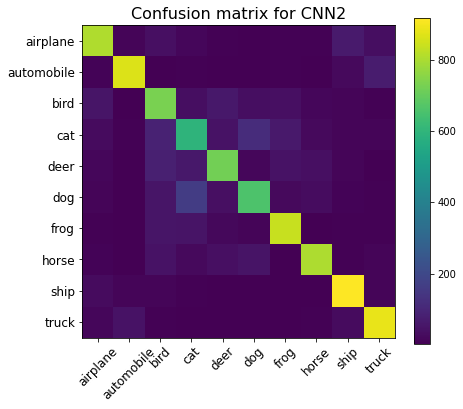

Test accuracy: 0.7834


In [37]:
# confusion matrix and accuracy

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix for CNN2', fontsize=16)
plt.imshow(confusion_matrix(Y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(Y_test, y_pred_test_classes))

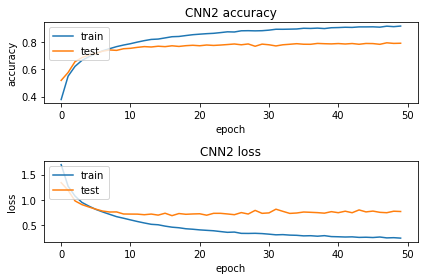

In [38]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

In [39]:
#CNN3
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])\

In [ ]:
model.summary()

In [40]:
history = model.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_split=0.3,batch_size=128)

Epoch 1/50
274/274 [==============================] - 4s 11ms/step - loss: 1.8357 - accuracy: 0.3179 - val_loss: 1.4515 - val_accuracy: 0.4647
Epoch 2/50
274/274 [==============================] - 3s 10ms/step - loss: 1.3253 - accuracy: 0.5170 - val_loss: 1.1243 - val_accuracy: 0.5974
Epoch 3/50
274/274 [==============================] - 3s 10ms/step - loss: 1.0873 - accuracy: 0.6125 - val_loss: 0.9738 - val_accuracy: 0.6585
Epoch 4/50
274/274 [==============================] - 3s 10ms/step - loss: 0.9573 - accuracy: 0.6643 - val_loss: 0.8387 - val_accuracy: 0.7043
Epoch 5/50
274/274 [==============================] - 3s 11ms/step - loss: 0.8600 - accuracy: 0.6995 - val_loss: 0.8434 - val_accuracy: 0.7019
Epoch 6/50
274/274 [==============================] - 3s 10ms/step - loss: 0.7910 - accuracy: 0.7221 - val_loss: 0.7756 - val_accuracy: 0.7265
Epoch 7/50
274/274 [==============================] - 3s 10ms/step - loss: 0.7307 - accuracy: 0.7418 - val_loss: 0.7117 - val_accuracy: 0.7537

In [44]:
# make test predictions
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

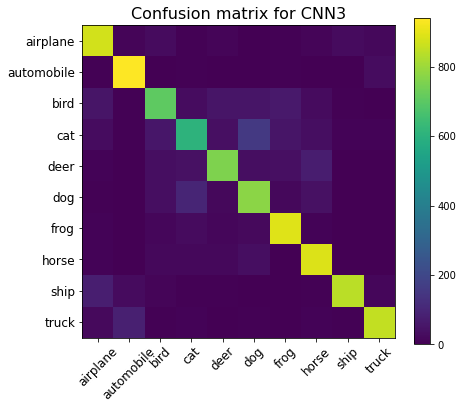

Test accuracy: 0.8141


In [45]:
# confusion matrix and accuracy

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix for CNN3', fontsize=16)
plt.imshow(confusion_matrix(Y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(Y_test, y_pred_test_classes))

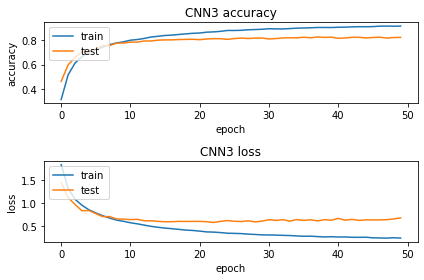

In [46]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

In [47]:
#CNN4
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])\

In [ ]:
model.summary()

In [48]:
history = model.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_split=0.3,batch_size=128)

Epoch 1/50
274/274 [==============================] - 4s 13ms/step - loss: 1.8183 - accuracy: 0.3159 - val_loss: 1.4948 - val_accuracy: 0.4355
Epoch 2/50
274/274 [==============================] - 3s 12ms/step - loss: 1.3960 - accuracy: 0.4890 - val_loss: 1.2301 - val_accuracy: 0.5619
Epoch 3/50
274/274 [==============================] - 3s 11ms/step - loss: 1.1719 - accuracy: 0.5802 - val_loss: 1.0468 - val_accuracy: 0.6252
Epoch 4/50
274/274 [==============================] - 3s 11ms/step - loss: 1.0008 - accuracy: 0.6463 - val_loss: 0.8996 - val_accuracy: 0.6815
Epoch 5/50
274/274 [==============================] - 3s 11ms/step - loss: 0.9022 - accuracy: 0.6830 - val_loss: 0.9238 - val_accuracy: 0.6847
Epoch 6/50
274/274 [==============================] - 3s 11ms/step - loss: 0.8076 - accuracy: 0.7181 - val_loss: 0.7703 - val_accuracy: 0.7268
Epoch 7/50
274/274 [==============================] - 3s 11ms/step - loss: 0.7335 - accuracy: 0.7439 - val_loss: 0.7185 - val_accuracy: 0.7481

In [49]:
# make test predictions
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

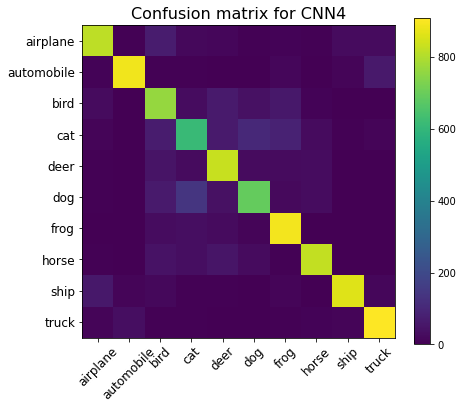

Test accuracy: 0.8086


In [50]:
# confusion matrix and accuracy

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix for CNN4', fontsize=16)
plt.imshow(confusion_matrix(Y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(Y_test, y_pred_test_classes))

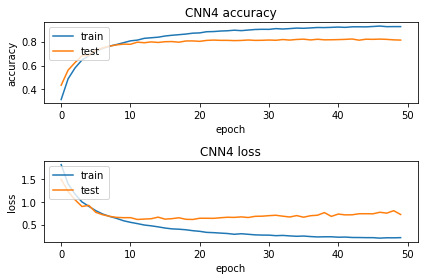

In [51]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

In [52]:
#CNN5
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])\

In [ ]:
model.summary()

In [53]:
history = model.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_split=0.3,batch_size=128)

Epoch 1/50
274/274 [==============================] - 5s 16ms/step - loss: 2.1595 - accuracy: 0.1634 - val_loss: 1.7470 - val_accuracy: 0.3144
Epoch 2/50
274/274 [==============================] - 4s 14ms/step - loss: 1.6673 - accuracy: 0.3627 - val_loss: 1.5275 - val_accuracy: 0.4419
Epoch 3/50
274/274 [==============================] - 4s 14ms/step - loss: 1.4328 - accuracy: 0.4738 - val_loss: 1.2465 - val_accuracy: 0.5493
Epoch 4/50
274/274 [==============================] - 4s 14ms/step - loss: 1.2375 - accuracy: 0.5593 - val_loss: 1.1168 - val_accuracy: 0.5995
Epoch 5/50
274/274 [==============================] - 4s 14ms/step - loss: 1.1077 - accuracy: 0.6087 - val_loss: 1.0111 - val_accuracy: 0.6483
Epoch 6/50
274/274 [==============================] - 4s 14ms/step - loss: 0.9852 - accuracy: 0.6522 - val_loss: 0.9381 - val_accuracy: 0.6731
Epoch 7/50
274/274 [==============================] - 4s 14ms/step - loss: 0.8976 - accuracy: 0.6863 - val_loss: 0.8523 - val_accuracy: 0.7032

In [54]:
# make test predictions
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

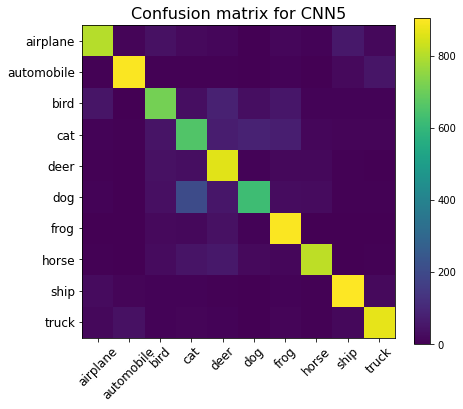

Test accuracy: 0.8053


In [55]:
# confusion matrix and accuracy

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix for CNN5', fontsize=16)
plt.imshow(confusion_matrix(Y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(Y_test, y_pred_test_classes))

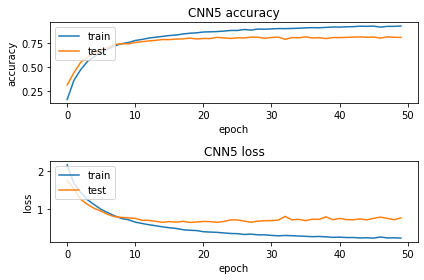

In [56]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

In [60]:
#CNN6
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])\

In [ ]:
model.summary()

In [61]:
history = model.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_split=0.3,batch_size=128)

Epoch 1/50
274/274 [==============================] - 10s 33ms/step - loss: 1.5886 - accuracy: 0.4823 - val_loss: 2.0339 - val_accuracy: 0.3031
Epoch 2/50
274/274 [==============================] - 10s 36ms/step - loss: 1.0850 - accuracy: 0.6219 - val_loss: 1.4994 - val_accuracy: 0.4840
Epoch 3/50
274/274 [==============================] - 9s 32ms/step - loss: 0.9266 - accuracy: 0.6770 - val_loss: 1.2158 - val_accuracy: 0.5813
Epoch 4/50
274/274 [==============================] - 10s 35ms/step - loss: 0.8227 - accuracy: 0.7101 - val_loss: 1.1507 - val_accuracy: 0.6367
Epoch 5/50
274/274 [==============================] - 10s 37ms/step - loss: 0.7338 - accuracy: 0.7413 - val_loss: 1.3951 - val_accuracy: 0.5771
Epoch 6/50
274/274 [==============================] - 9s 34ms/step - loss: 0.6467 - accuracy: 0.7718 - val_loss: 0.9822 - val_accuracy: 0.6708
Epoch 7/50
274/274 [==============================] - 11s 39ms/step - loss: 0.5622 - accuracy: 0.8029 - val_loss: 1.0456 - val_accuracy: 0

In [62]:
# make test predictions
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

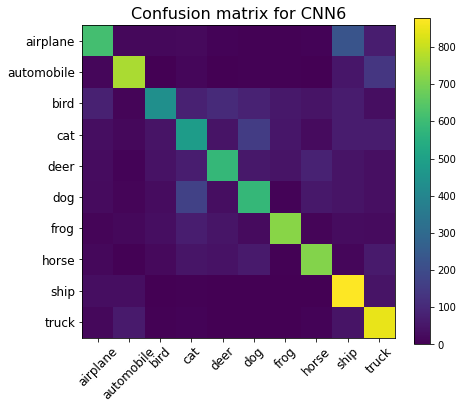

Test accuracy: 0.6627


In [63]:
# confusion matrix and accuracy

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix for CNN6', fontsize=16)
plt.imshow(confusion_matrix(Y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(Y_test, y_pred_test_classes))

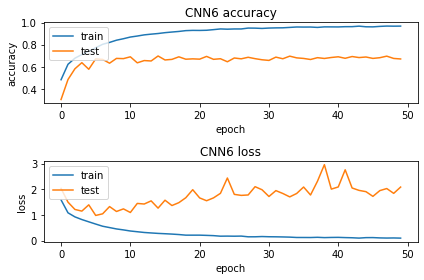

In [64]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN6 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

In [7]:
#CNN7
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])\

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                          

In [9]:
history = model.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_split=0.3,batch_size=128)

Epoch 1/50
274/274 [==============================] - 17s 23ms/step - loss: 1.7084 - accuracy: 0.4048 - val_loss: 6.8398 - val_accuracy: 0.0987
Epoch 2/50
274/274 [==============================] - 6s 22ms/step - loss: 1.1797 - accuracy: 0.5823 - val_loss: 3.8470 - val_accuracy: 0.2375
Epoch 3/50
274/274 [==============================] - 6s 22ms/step - loss: 0.9015 - accuracy: 0.6868 - val_loss: 1.3079 - val_accuracy: 0.5946
Epoch 4/50
274/274 [==============================] - 6s 21ms/step - loss: 0.7579 - accuracy: 0.7378 - val_loss: 1.0034 - val_accuracy: 0.6900
Epoch 5/50
274/274 [==============================] - 6s 20ms/step - loss: 0.6598 - accuracy: 0.7728 - val_loss: 0.8827 - val_accuracy: 0.7158
Epoch 6/50
274/274 [==============================] - 6s 22ms/step - loss: 0.5724 - accuracy: 0.8002 - val_loss: 0.7600 - val_accuracy: 0.7585
Epoch 7/50
274/274 [==============================] - 5s 20ms/step - loss: 0.5188 - accuracy: 0.8207 - val_loss: 0.6297 - val_accuracy: 0.788

In [10]:
# make test predictions
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

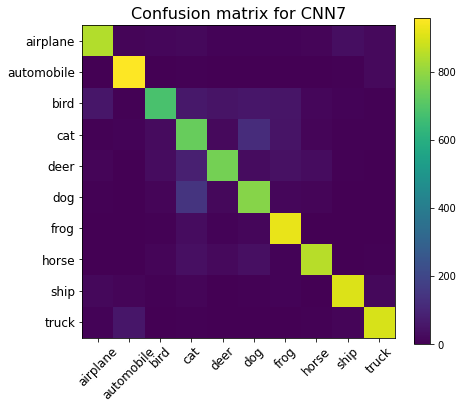

Test accuracy: 0.8367


In [11]:
# confusion matrix and accuracy

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix for CNN7', fontsize=16)
plt.imshow(confusion_matrix(Y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(Y_test, y_pred_test_classes))

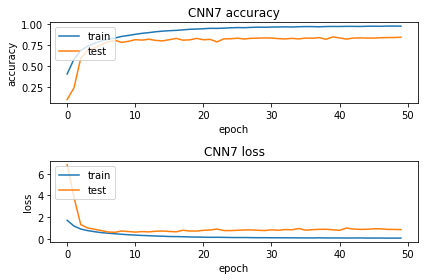

In [12]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN7 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN7 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

In [70]:
#CNN8
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])\

In [ ]:
model.summary()

In [71]:
history = model.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_split=0.3,batch_size=128)

Epoch 1/50
274/274 [==============================] - 11s 32ms/step - loss: 1.9339 - accuracy: 0.3675 - val_loss: 6.4006 - val_accuracy: 0.0984
Epoch 2/50
274/274 [==============================] - 8s 29ms/step - loss: 1.3047 - accuracy: 0.5500 - val_loss: 2.1734 - val_accuracy: 0.3724
Epoch 3/50
274/274 [==============================] - 8s 29ms/step - loss: 1.0290 - accuracy: 0.6476 - val_loss: 0.9998 - val_accuracy: 0.6423
Epoch 4/50
274/274 [==============================] - 8s 29ms/step - loss: 0.8529 - accuracy: 0.7115 - val_loss: 0.8992 - val_accuracy: 0.6927
Epoch 5/50
274/274 [==============================] - 8s 30ms/step - loss: 0.7243 - accuracy: 0.7548 - val_loss: 0.8215 - val_accuracy: 0.7233
Epoch 6/50
274/274 [==============================] - 8s 30ms/step - loss: 0.6345 - accuracy: 0.7821 - val_loss: 0.6824 - val_accuracy: 0.7689
Epoch 7/50
274/274 [==============================] - 8s 29ms/step - loss: 0.5574 - accuracy: 0.8109 - val_loss: 0.7618 - val_accuracy: 0.755

In [72]:
# make test predictions
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

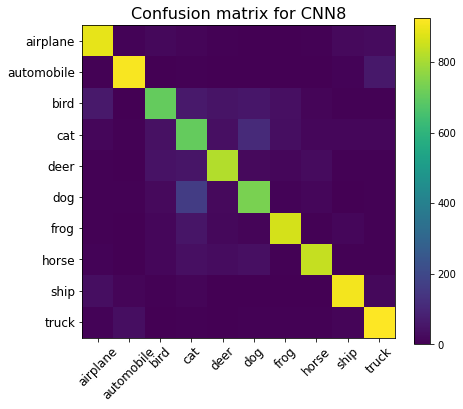

Test accuracy: 0.8323


In [73]:
# confusion matrix and accuracy

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix for CNN8', fontsize=16)
plt.imshow(confusion_matrix(Y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(Y_test, y_pred_test_classes))

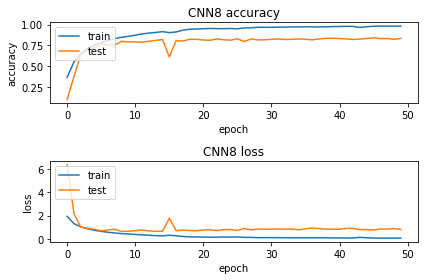

In [74]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN8 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN8 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()